### Import the necessary libraries

In [0]:
from pyspark.ml import PipelineModel
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import functions as F

### Read the dataset

In [0]:
df = spark.read.parquet('/mnt/2024-team20/cleaned_reddit_comments_parquet')

### Load the model pipeline

In [0]:
pipeline_model = PipelineModel.load('/mnt/2024-team20/model')

### Transform the dataset using the model pipeline

In [0]:
predicted_df = pipeline_model.transform(df)

In [0]:
predicted_df.select("prediction").show(5, truncate=False)

+----------+
|prediction|
+----------+
|1.0       |
|1.0       |
|0.0       |
|0.0       |
|2.0       |
+----------+
only showing top 5 rows



### Assign Labels to the Predictions

In [0]:
predicted_df = predicted_df.withColumn('label', 
                                       F.when(F.col('prediction') == 0.0, 'neutral')
                                       .when(F.col('prediction') == 1.0, 'positive')
                                       .otherwise('negative'))

In [0]:
predicted_df.select('prediction', 'label').show(5, truncate=False)

+----------+--------+
|prediction|label   |
+----------+--------+
|1.0       |positive|
|1.0       |positive|
|0.0       |neutral |
|0.0       |neutral |
|2.0       |negative|
+----------+--------+
only showing top 5 rows



### Grouping By Label 

In [0]:
label_counts = predicted_df.groupBy('label').count()

label_counts.show()

+--------+-----+
|   label|count|
+--------+-----+
|positive|65592|
| neutral|14346|
|negative|63345|
+--------+-----+



### Collecting Result to the driver node 

In [0]:
label_counts_data = label_counts.collect()

### Plotting

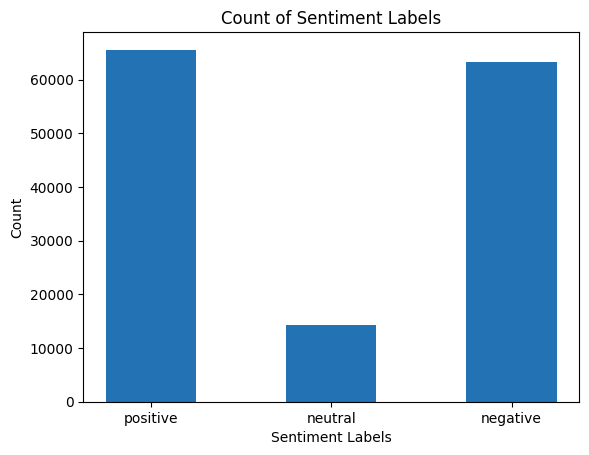

In [0]:

labels = [row['label'] for row in label_counts_data]

counts = [row['count'] for row in label_counts_data]

color = (34/255, 114/255, 180/255)

plt.bar(labels, counts, width = 0.5, color = color)

plt.xlabel('Sentiment Labels')

plt.ylabel('Count')

plt.title('Count of Sentiment Labels')

plt.show()
